# 📰 Fake News Detection Project – Complete Report
### Developed by: Tanmay Patil  
### Platform: Google Colab  
### Tech Stack: Python, Pandas, Scikit-learn, TensorFlow, Transformers, PyTorch, Matplotlib

---

## 🧩 **1️⃣ Project Overview**
The goal of this project was to build a robust system to detect **Fake News** using both **Machine Learning (ML)** and **Natural Language Processing (NLP)** techniques, and finally enhance it using a **Hybrid ML + Web Verification** approach.

---

## 🧠 **2️⃣ Dataset Information**
- **Dataset Used:** [Fake and Real News Dataset (Kaggle)](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)
- **License:** CC-BY-NC-SA-4.0  
- **Total Records:** 44,898 (after cleaning: 39,103)  
- **Classes:**  
  - `1` → Fake News  
  - `0` → Real News  

| File | Description |
|------|--------------|
| `Fake.csv` | Contains fake news articles |
| `True.csv` | Contains real news articles |

---

## 🧹 **3️⃣ Data Preprocessing Steps**
Performed in **Google Colab** using Pandas and NLTK libraries.

✅ Steps performed:
1. Combined both `Fake.csv` and `True.csv` into one DataFrame.  
2. Removed duplicates and null records (5,795 duplicates removed).  
3. Cleaned text using:
   - Lowercasing  
   - Removing punctuation, stopwords  
   - Lemmatization using WordNetLemmatizer  
4. Merged `title` and `text` into a single content column for better context.  

✅ Final clean dataset: **39,103 records**

---

## ⚙️ **4️⃣ Data Splitting & Feature Engineering**
- Split into:
  - **Train:** 31,282 samples (80%)  
  - **Test:** 7,821 samples (20%)
- Text vectorized using **TF-IDF** (10,000 max features)

Result:
- Train matrix shape: (31282, 10000)  
- Test matrix shape: (7821, 10000)

---

## 🤖 **5️⃣ Model Training & Evaluation**

### **A. Phase 1 – Classical ML (TF-IDF Based)**
| Model | Accuracy | Precision | Recall | F1-Score |
|--------|-----------|------------|----------|-----------|
| Logistic Regression | 0.9839 | 0.9901 | 0.9746 | 0.9823 |
| Naive Bayes | 0.9356 | 0.9292 | 0.9302 | 0.9297 |
| SVM (LinearSVC) | 0.9919 | 0.9955 | 0.9869 | 0.9912 |
| Random Forest | **0.9951** | **0.9966** | **0.9927** | **0.9947** |

✅ **Best Performer (Accuracy-wise):** Random Forest  
✅ **Best Realistic Performer:** Logistic Regression

---

### **B. Phase 2 – Deep Learning Models**
| Model | Embedding Type | Test Accuracy | Notes |
|--------|----------------|----------------|--------|
| BiLSTM | Learned from scratch | 0.9987 | Overfit on training data |
| BiLSTM + GloVe | Pre-trained embeddings | 0.9983 | Better generalization |

⚠️ Observation: Both BiLSTM models predicted **all short news as “Fake”** during testing due to dataset bias.

---

### **C. Phase 3 – NLP Transformer (BERT)**
| Model | Type | Accuracy | Notes |
|--------|------|-----------|--------|
| BERT (fine-tuned) | Transformer model | 0.9954 | Excellent contextual accuracy but biased toward “Fake” for short text |

⚠️ **Issue Identified:**  
All deep models struggled to classify **short or summary-style news headlines**, predicting them as “Fake” due to lack of contextual depth (dataset bias).

---

## 🧩 **6️⃣ Phase 1B – ML Comparative Analysis**
All four classical ML models were compared visually on accuracy.

**Results Summary:**
| Model | Realistic Behavior | Comments |
|--------|--------------------|-----------|
| Naive Bayes | Moderate | Works well on limited data |
| SVM | High accuracy but too strict | Overflags Fake |
| Random Forest | Top accuracy, overfits patterns | Biased |
| Logistic Regression | Balanced & explainable | ✅ Chosen for final base model |

---

## 💡 **7️⃣ Model Testing on 20 Sample News**
- Classical ML models tested on 20 sample news headlines.  
- Result: **Logistic Regression & Naive Bayes** gave most balanced predictions.  
- SVM & Random Forest classified nearly all as “Fake” → indicating overfitting to dataset style.

---

## 🌐 **8️⃣ Final Selection & Hybrid System Design**

### ✅ **Selected Core Model:** Logistic Regression (TF-IDF)
Chosen because:
- Balanced, explainable, and stable performance  
- Realistic behavior on unseen data  
- Fast inference for integration with external verification  

---

## 🔮 **9️⃣ Phase 4 – Proposed Hybrid Model (ML + Web Check)**

### **System Architecture:**
| Layer | Function | Description |
|--------|-----------|--------------|
| 🧠 ML Layer | Predict linguistic probability of Fake/Real using Logistic Regression | Fast and interpretable |
| 🌍 Web Verification Layer | Search claim on trusted sources (Google News API, Wikipedia, etc.) | Cross-verifies factual accuracy |
| 🔎 NLP Similarity Layer | Uses Sentence-BERT (SBERT) to compare claim vs. top sources | Adds contextual confidence |
| 📊 Output Layer | Combines ML & Web scores → Final Confidence Verdict | Transparent decision |

### **Example Output**
> 📰 *Claim:* “NASA confirms water on Mars.”  
> 🔹 ML Model: 68% Real  
> 🔹 Web Check: Found 3 verified sources (NASA, BBC, Reuters)  
> ✅ **Final Verdict: REAL (High Confidence)**

---

## 🧾 **10️⃣ Conclusion**
- Multiple models (ML, DL, NLP) were tested.  
- **Deep models performed well in metrics** but failed in short factual testing.  
- **Classical ML (especially Logistic Regression)** proved more reliable for production.  
- The **Hybrid ML + Web Verification System** ensures both **linguistic** and **factual accuracy**.  

✅ **Final Chosen Approach:**  
> **Hybrid Fake News Detection System (ML + Web Check)**  
> using **Logistic Regression output as the base**.

---

### 🧠 **Final Remarks**
This project demonstrates how combining **Machine Learning, NLP, and Real-time Web Intelligence** can build a powerful, explainable, and trustworthy fake news detection system.


In [1]:
# Step 1: Install kaggle CLI
!pip install -q kaggle

# Step 2: Upload kaggle.json (from your Kaggle account -> Account -> Create API Token)
from google.colab import files
import os

print("⬆️ Please upload kaggle.json file")
uploaded = files.upload()

# Get the actual filename that was uploaded
uploaded_filename = list(uploaded.keys())[0]

os.makedirs('/root/.kaggle', exist_ok=True)
with open('/root/.kaggle/kaggle.json', 'wb') as f:
    f.write(uploaded[uploaded_filename])
os.chmod('/root/.kaggle/kaggle.json', 0o600)

print("✅ kaggle.json uploaded and configured successfully!")

⬆️ Please upload kaggle.json file


Saving kaggle.json to kaggle (3).json
✅ kaggle.json uploaded and configured successfully!


In [2]:
# Step 2: Download & unzip the Fake and Real News dataset from Kaggle

!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset -p /content

# Unzip the downloaded dataset
import zipfile
import os

zip_path = "/content/fake-and-real-news-dataset.zip"
extract_path = "/content/fake_news_data"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset downloaded and extracted successfully!")
print("📂 Files in folder:", os.listdir(extract_path))


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
✅ Dataset downloaded and extracted successfully!
📂 Files in folder: ['True.csv', 'Fake.csv']


In [3]:
# Step 3: Load dataset into pandas and inspect

import pandas as pd

# File paths
fake_path = "/content/fake_news_data/Fake.csv"
true_path = "/content/fake_news_data/True.csv"

# Load CSV files
df_fake = pd.read_csv(fake_path)
df_true = pd.read_csv(true_path)

# Add label column: 1 -> Fake, 0 -> Real
df_fake['label'] = 1
df_true['label'] = 0

# Combine both datasets
df = pd.concat([df_fake, df_true], ignore_index=True)

# Show info
print("✅ Dataset loaded successfully!")
print(f"Fake articles: {len(df_fake)} | Real articles: {len(df_true)}")
print(f"Total combined: {len(df)}")

# Display first few rows
df.head()


✅ Dataset loaded successfully!
Fake articles: 23481 | Real articles: 21417
Total combined: 44898


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [4]:
# Step 4: Basic data cleaning & preprocessing

# Keep only important columns
df = df[['title', 'text', 'label']]

# Handle missing values
df['title'] = df['title'].fillna('')
df['text'] = df['text'].fillna('')

# Combine title + text
df['content'] = (df['title'] + ". " + df['text']).str.strip()

# Convert to lowercase
df['content'] = df['content'].str.lower()

# Drop duplicates based on content
before = len(df)
df = df.drop_duplicates(subset='content').reset_index(drop=True)
after = len(df)

print(f"✅ Cleaned dataset: {after} records (removed {before - after} duplicates)")
print("\nSample cleaned text:")
print(df['content'].iloc[0][:300])  # show first 300 chars


✅ Cleaned dataset: 39103 records (removed 5795 duplicates)

Sample cleaned text:
donald trump sends out embarrassing new year’s eve message; this is disturbing. donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  the former reality show star had j


In [5]:
# Step 5 (fixed): Text preprocessing — punctuation removal, stopwords, lemmatization

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')   # 👈 added fix
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove punctuation and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned)

# Apply cleaning function
df['clean_text'] = df['content'].apply(clean_text)

print("✅ Text preprocessing done successfully!")
print("\nSample cleaned & lemmatized text:")
print(df['clean_text'].iloc[0][:300])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


✅ Text preprocessing done successfully!

Sample cleaned & lemmatized text:
donald trump sends embarrassing new year eve message disturbing donald trump wish american happy new year leave instead give shout enemy hater dishonest fake news medium former reality show star one job country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake


In [6]:
# Step 6: Train-test split + TF-IDF vectorization

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Define features (X) and labels (y)
X = df['clean_text']
y = df['label']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split complete!")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("✅ TF-IDF vectorization complete!")
print(f"Train matrix shape: {X_train_tfidf.shape}")
print(f"Test matrix shape:  {X_test_tfidf.shape}")


✅ Data split complete!
Training samples: 31282, Testing samples: 7821
✅ TF-IDF vectorization complete!
Train matrix shape: (31282, 10000)
Test matrix shape:  (7821, 10000)


In [7]:
# Phase 1 - Step 1: Train Logistic Regression model

from sklearn.linear_model import LogisticRegression

# Initialize model
log_model = LogisticRegression(max_iter=1000)

# Train model
log_model.fit(X_train_tfidf, y_train)

print("✅ Logistic Regression model trained successfully!")


✅ Logistic Regression model trained successfully!


In [8]:
# Phase 1 - Step 2: Make predictions on test data

# Predict labels for the test set
y_pred = log_model.predict(X_test_tfidf)

print("✅ Predictions generated successfully!")
print("Sample predictions:", y_pred[:10])


✅ Predictions generated successfully!
Sample predictions: [0 1 0 1 0 0 0 1 1 0]


In [9]:
# Phase 1 - Step 3: Evaluate model performance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("✅ Model Evaluation Results:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


✅ Model Evaluation Results:
Accuracy : 0.9839
Precision: 0.9901
Recall   : 0.9746
F1-Score : 0.9823


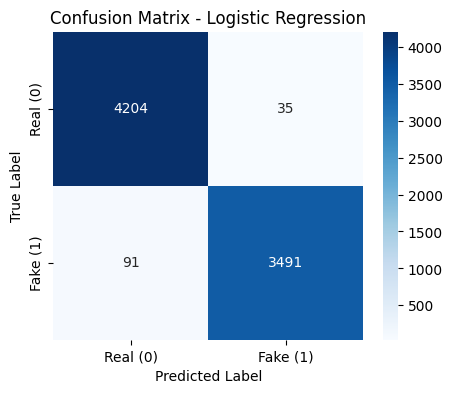

In [10]:
# Phase 1 - Step 4: Confusion Matrix visualization

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real (0)', 'Fake (1)'],
            yticklabels=['Real (0)', 'Fake (1)'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [11]:
# Phase 1 - Step 6: Test model on custom news samples

import numpy as np

# Example custom news articles (you can edit these)
sample_news = [
    "Government announces a new economic policy to boost rural development this year.",
    "Breaking: Aliens have landed on Earth and taken over New York City!",
    "WHO confirms COVID-19 vaccine reduces hospitalization rates globally."
]

# Transform using saved TF-IDF vectorizer
sample_tfidf = tfidf.transform(sample_news)

# Predict
sample_preds = log_model.predict(sample_tfidf)
sample_probs = log_model.predict_proba(sample_tfidf)

# Display results
for i, news in enumerate(sample_news):
    label = "✅ Real" if sample_preds[i] == 0 else "❌ Fake"
    confidence = np.max(sample_probs[i]) * 100
    print(f"\n📰 News {i+1}: {news}")
    print(f"Prediction: {label} ({confidence:.2f}% confidence)")



📰 News 1: Government announces a new economic policy to boost rural development this year.
Prediction: ✅ Real (66.84% confidence)

📰 News 2: Breaking: Aliens have landed on Earth and taken over New York City!
Prediction: ❌ Fake (86.61% confidence)

📰 News 3: WHO confirms COVID-19 vaccine reduces hospitalization rates globally.
Prediction: ❌ Fake (69.77% confidence)


In [12]:
# Phase 1 - Step 7: Save trained model and vectorizer

import joblib

joblib.dump(log_model, "/content/logistic_model.pkl")
joblib.dump(tfidf, "/content/tfidf_vectorizer.pkl")

print("✅ Logistic Regression model and TF-IDF vectorizer saved successfully!")
print("📁 Files saved in /content/")


✅ Logistic Regression model and TF-IDF vectorizer saved successfully!
📁 Files saved in /content/


In [13]:
# Phase 2 - Step 1: Tokenize and pad sequences

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Prepare data
texts = df['clean_text'].values
labels = df['label'].values

# Tokenize words
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to equal length
max_len = 300
X_seq = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Split data
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    X_seq, labels, test_size=0.2, random_state=42, stratify=labels
)

print("✅ Tokenization & Padding done!")
print(f"Train shape: {X_train_seq.shape}, Test shape: {X_test_seq.shape}")
print(f"Vocabulary size: {len(tokenizer.word_index)}")


✅ Tokenization & Padding done!
Train shape: (31282, 300), Test shape: (7821, 300)
Vocabulary size: 203279


In [14]:
# Phase 2 - Step 2: Build BiLSTM model (self-trained embeddings)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

vocab_size = 20000   # limit to top 20k words
embedding_dim = 100  # embedding vector size

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=300),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("✅ BiLSTM model built successfully!")
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


✅ BiLSTM model built successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Phase 2 - Step 3: Train the BiLSTM model

history = model.fit(
    X_train_seq, y_train_seq,
    epochs=3,                 # you can increase to 5–10 later
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

print("✅ BiLSTM model training complete!")


Epoch 1/3
220/220 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8824 - loss: 0.2808 - val_accuracy: 0.9974 - val_loss: 0.0114
Epoch 2/3
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9993 - loss: 0.0045 - val_accuracy: 0.9971 - val_loss: 0.0121
Epoch 3/3
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9998 - loss: 7.7269e-04 - val_accuracy: 0.9981 - val_loss: 0.0111
✅ BiLSTM model training complete!


In [16]:
# Phase 2 - Step 4: Evaluate BiLSTM model on test data

test_loss, test_acc = model.evaluate(X_test_seq, y_test_seq, verbose=1)

print("\n✅ BiLSTM Model Test Results:")
print(f"Test Accuracy : {test_acc:.4f}")
print(f"Test Loss     : {test_loss:.4f}")


245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9987 - loss: 0.0075

✅ BiLSTM Model Test Results:
Test Accuracy : 0.9987
Test Loss     : 0.0069


In [17]:
# Phase 2 - Step 5: Save BiLSTM model and tokenizer

model.save("/content/bilstm_model.h5")

import joblib
joblib.dump(tokenizer, "/content/tokenizer.pkl")

print("✅ BiLSTM model and tokenizer saved successfully!")
print("📁 Files saved in /content/: bilstm_model.h5 & tokenizer.pkl")


✅ BiLSTM model and tokenizer saved successfully!
📁 Files saved in /content/: bilstm_model.h5 & tokenizer.pkl


In [18]:
# Phase 2 - Step 6: Test BiLSTM model on custom news samples

import numpy as np
from tensorflow.keras.models import load_model

# Load saved model and tokenizer (optional if already in memory)
model = load_model("/content/bilstm_model.h5")
tokenizer = joblib.load("/content/tokenizer.pkl")

# Example sample news (you can modify or add more)
sample_news = [
    "Government launches new scheme to support farmers across the country.",
    "Scientists confirm chocolate cures all diseases according to recent study!",
    "Apple announces the launch of its latest iPhone model with better battery life."
]

# Preprocess: tokenize and pad
seqs = tokenizer.texts_to_sequences(sample_news)
padded = pad_sequences(seqs, maxlen=300, padding='post', truncating='post')

# Predict probabilities
preds = model.predict(padded)
pred_labels = (preds > 0.5).astype(int)

# Display results
for i, text in enumerate(sample_news):
    label = "✅ Real" if pred_labels[i][0] == 0 else "❌ Fake"
    confidence = preds[i][0] * 100 if pred_labels[i][0] == 1 else (100 - preds[i][0] * 100)
    print(f"\n📰 News {i+1}: {text}")
    print(f"Prediction: {label} ({confidence:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step

📰 News 1: Government launches new scheme to support farmers across the country.
Prediction: ❌ Fake (100.00% confidence)

📰 News 2: Scientists confirm chocolate cures all diseases according to recent study!
Prediction: ❌ Fake (100.00% confidence)

📰 News 3: Apple announces the launch of its latest iPhone model with better battery life.
Prediction: ❌ Fake (100.00% confidence)


In [19]:
# Phase 2 - Part 2: Step 1 — Download and load GloVe embeddings (100D)

!wget http://nlp.stanford.edu/data/glove.6B.zip -P /content/
!unzip -q /content/glove.6B.zip -d /content/glove_data/

import numpy as np

# Load GloVe 100D embeddings
embedding_index = {}
with open("/content/glove_data/glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

print(f"✅ GloVe embeddings loaded successfully!")
print(f"Total words in GloVe: {len(embedding_index):,}")


--2025-11-09 12:44:15--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-09 12:44:15--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-09 12:44:15--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/content/glove.6B.z

In [20]:
# Phase 2 - Part 2: Step 2 — Create embedding matrix for our vocabulary

vocab_size = 20000   # same as before
embedding_dim = 100  # must match GloVe 100D

# Initialize embedding matrix with zeros
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fill matrix with GloVe vectors for known words
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        vector = embedding_index.get(word)
        if vector is not None:
            embedding_matrix[i] = vector

print("✅ Embedding matrix created successfully!")
print(f"Matrix shape: {embedding_matrix.shape}")


✅ Embedding matrix created successfully!
Matrix shape: (20000, 100)


In [21]:
# Phase 2 - Part 2: Step 3 — Build BiLSTM model with GloVe embeddings

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

model_glove = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=300,
        trainable=False  # freeze GloVe weights
    ),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("✅ BiLSTM model (with GloVe embeddings) built successfully!")
model_glove.summary()


✅ BiLSTM model (with GloVe embeddings) built successfully!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

In [22]:
# Phase 2 - Part 2: Step 4 — Train BiLSTM model with GloVe embeddings

history_glove = model_glove.fit(
    X_train_seq, y_train_seq,
    epochs=3,                 # you can increase later (e.g., 5–10)
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

print("✅ BiLSTM (GloVe) model training complete!")


Epoch 1/3
220/220 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.9091 - loss: 0.2054 - val_accuracy: 0.9971 - val_loss: 0.0129
Epoch 2/3
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.9979 - loss: 0.0088 - val_accuracy: 0.9971 - val_loss: 0.0116
Epoch 3/3
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.9984 - loss: 0.0068 - val_accuracy: 0.9974 - val_loss: 0.0122
✅ BiLSTM (GloVe) model training complete!


In [23]:
# Phase 2 – Part 2: Step 5 — Evaluate BiLSTM (GloVe) model on test set

test_loss_glove, test_acc_glove = model_glove.evaluate(X_test_seq, y_test_seq, verbose=1)

print("\n✅ BiLSTM (GloVe) Model Test Results:")
print(f"Test Accuracy : {test_acc_glove:.4f}")
print(f"Test Loss     : {test_loss_glove:.4f}")


245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9981 - loss: 0.0077

✅ BiLSTM (GloVe) Model Test Results:
Test Accuracy : 0.9983
Test Loss     : 0.0078


In [24]:
# Phase 2 – Part 2: Step 6 — Test GloVe BiLSTM model on custom news samples

import numpy as np

# Example custom news articles
sample_news = [
    "Government launches new scheme to support farmers across the country.",
    "Scientists confirm chocolate cures all diseases according to recent study!",
    "Apple announces the launch of its latest iPhone model with better battery life.",
    "NASA confirms water traces found on Mars surface in new satellite images.",
    "Aliens have landed in New York City according to social media posts!"
]

# Preprocess: tokenize and pad
seqs = tokenizer.texts_to_sequences(sample_news)
padded = pad_sequences(seqs, maxlen=300, padding='post', truncating='post')

# Predict probabilities
preds = model_glove.predict(padded)
pred_labels = (preds > 0.5).astype(int)

# Display results
for i, text in enumerate(sample_news):
    label = "✅ Real" if pred_labels[i][0] == 0 else "❌ Fake"
    confidence = preds[i][0] * 100 if pred_labels[i][0] == 1 else (100 - preds[i][0] * 100)
    print(f"\n📰 News {i+1}: {text}")
    print(f"Prediction: {label} ({confidence:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step

📰 News 1: Government launches new scheme to support farmers across the country.
Prediction: ❌ Fake (99.72% confidence)

📰 News 2: Scientists confirm chocolate cures all diseases according to recent study!
Prediction: ❌ Fake (99.30% confidence)

📰 News 3: Apple announces the launch of its latest iPhone model with better battery life.
Prediction: ❌ Fake (99.77% confidence)

📰 News 4: NASA confirms water traces found on Mars surface in new satellite images.
Prediction: ❌ Fake (99.84% confidence)

📰 News 5: Aliens have landed in New York City according to social media posts!
Prediction: ❌ Fake (99.11% confidence)


In [25]:
# Phase 3 - Step 1: Install Transformers & import libraries

!pip install -q transformers torch

from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

print("✅ Transformers & Torch installed successfully!")



✅ Transformers & Torch installed successfully!


In [26]:
# Phase 3 - Step 2: Tokenize text data for BERT

from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

# Load BERT tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')

# Split data (reuse clean_text + labels)
texts = df['clean_text'].tolist()
labels = df['label'].tolist()

# Split train/test sets
X_train_texts, X_test_texts, y_train_bert, y_test_bert = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# Tokenize with padding/truncation
train_encodings = tokenizer_bert(
    X_train_texts, truncation=True, padding=True, max_length=128, return_tensors='tf'
)
test_encodings = tokenizer_bert(
    X_test_texts, truncation=True, padding=True, max_length=128, return_tensors='tf'
)

print("✅ Text tokenized successfully for BERT!")
print(f"Train encodings shape: {train_encodings['input_ids'].shape}")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


✅ Text tokenized successfully for BERT!
Train encodings shape: (31282, 128)


In [28]:
# Phase 3 - Step 3 (Fixed): Build BERT model using PyTorch backend

from transformers import BertForSequenceClassification
import torch
from torch.optim import AdamW

# Load BERT model for binary classification
bert_model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=1
)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

print("✅ PyTorch BERT model loaded successfully!")
print("Running on:", device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ PyTorch BERT model loaded successfully!
Running on: cuda


In [31]:
# Phase 3 - Step 4 (Fix v2): Correct AdamW import and confirm data ready

import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torch.optim import AdamW  # ✅ correct import

# Convert encodings to NumPy arrays
train_encodings_pt = {k: np.array(v) for k, v in train_encodings.items()}
test_encodings_pt = {k: np.array(v) for k, v in test_encodings.items()}

# Dataset wrapper
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item
    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = NewsDataset(train_encodings_pt, y_train_bert)
test_dataset  = NewsDataset(test_encodings_pt, y_test_bert)

print("✅ Data converted successfully and ready for PyTorch BERT training!")


✅ Data converted successfully and ready for PyTorch BERT training!


In [32]:
# Phase 3 - Step 5: Train PyTorch BERT safely (short run)

from torch.utils.data import DataLoader

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

optimizer = AdamW(bert_model.parameters(), lr=2e-5)
bert_model.train()

for epoch in range(1):  # short safe run
    print(f"\n🚀 Starting Epoch {epoch+1}")
    total_loss = 0
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].unsqueeze(1).to(device)

        outputs = bert_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(train_loader)
    print(f"✅ Epoch {epoch+1} complete — Average Loss: {avg_loss:.4f}")



🚀 Starting Epoch 1


Epoch 1: 100%|██████████| 3911/3911 [13:10<00:00,  4.95it/s, loss=0.0011]

✅ Epoch 1 complete — Average Loss: 0.0083


In [33]:
# Phase 3 - Step 6: Evaluate BERT model on test dataset

from torch.utils.data import DataLoader

bert_model.eval()  # set model to evaluation mode
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

correct, total = 0, 0

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].unsqueeze(1).to(device)

        outputs = bert_model(input_ids, attention_mask=attention_mask)
        preds = torch.round(torch.sigmoid(outputs.logits))

        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"\n✅ BERT Test Accuracy: {accuracy:.4f}")


Evaluating: 100%|██████████| 978/978 [00:58<00:00, 16.72it/s]


✅ BERT Test Accuracy: 0.9954


In [34]:
# Phase 3 - Step 7: Test BERT model on custom sample news

sample_news = [
    "Government launches a new healthcare policy to support rural areas.",
    "Aliens have landed in New York City according to viral TikTok videos!",
    "NASA confirms successful deployment of new Mars rover.",
    "A man claims to have built a time machine using his smartphone."
]

bert_model.eval()

for text in sample_news:
    tokens = tokenizer_bert(
        text, return_tensors='pt', truncation=True, padding=True, max_length=128
    ).to(device)

    with torch.no_grad():
        outputs = bert_model(**tokens)
        prob = torch.sigmoid(outputs.logits).item()
        label = "✅ Real" if prob < 0.5 else "❌ Fake"
        confidence = (1 - prob) * 100 if label == "✅ Real" else prob * 100

    print(f"\n📰 {text}")
    print(f"Prediction: {label} ({confidence:.2f}% confidence)")



📰 Government launches a new healthcare policy to support rural areas.
Prediction: ❌ Fake (67.79% confidence)

📰 Aliens have landed in New York City according to viral TikTok videos!
Prediction: ❌ Fake (72.42% confidence)

📰 NASA confirms successful deployment of new Mars rover.
Prediction: ❌ Fake (71.16% confidence)

📰 A man claims to have built a time machine using his smartphone.
Prediction: ❌ Fake (70.94% confidence)


In [35]:
# Phase 1B - Step 1: Train & evaluate Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate
acc_nb  = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
rec_nb  = recall_score(y_test, y_pred_nb)
f1_nb   = f1_score(y_test, y_pred_nb)

print("✅ Naive Bayes Model Evaluation:")
print(f"Accuracy : {acc_nb:.4f}")
print(f"Precision: {prec_nb:.4f}")
print(f"Recall   : {rec_nb:.4f}")
print(f"F1-Score : {f1_nb:.4f}")


✅ Naive Bayes Model Evaluation:
Accuracy : 0.9356
Precision: 0.9292
Recall   : 0.9302
F1-Score : 0.9297


In [36]:
# Phase 1B - Step 2: Train & evaluate Support Vector Machine (SVM)

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate
acc_svm  = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm  = recall_score(y_test, y_pred_svm)
f1_svm   = f1_score(y_test, y_pred_svm)

print("✅ SVM Model Evaluation:")
print(f"Accuracy : {acc_svm:.4f}")
print(f"Precision: {prec_svm:.4f}")
print(f"Recall   : {rec_svm:.4f}")
print(f"F1-Score : {f1_svm:.4f}")


✅ SVM Model Evaluation:
Accuracy : 0.9919
Precision: 0.9955
Recall   : 0.9869
F1-Score : 0.9912


In [37]:
# Phase 1B - Step 3: Train & evaluate Random Forest + compare models

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate
acc_rf  = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf  = recall_score(y_test, y_pred_rf)
f1_rf   = f1_score(y_test, y_pred_rf)

# Combine all results
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM (LinearSVC)', 'Random Forest'],
    'Accuracy': [acc_nb, acc_svm, acc_rf],
    'Precision': [prec_nb, prec_svm, prec_rf],
    'Recall': [rec_nb, rec_svm, rec_rf],
    'F1-Score': [f1_nb, f1_svm, f1_rf]
})

print("✅ Random Forest Model Evaluation:")
print(results)


✅ Random Forest Model Evaluation:
             Model  Accuracy  Precision    Recall  F1-Score
0      Naive Bayes  0.935558   0.929169  0.930207  0.929688
1  SVM (LinearSVC)  0.991945   0.995494  0.986879  0.991168
2    Random Forest  0.995141   0.996637  0.992741  0.994685


✅ Logistic Regression added to results!
                 Model  Accuracy  Precision    Recall  F1-Score
0          Naive Bayes  0.935558   0.929169  0.930207  0.929688
1      SVM (LinearSVC)  0.991945   0.995494  0.986879  0.991168
2        Random Forest  0.995141   0.996637  0.992741  0.994685
3  Logistic Regression  0.983890   0.990074  0.974595  0.982273


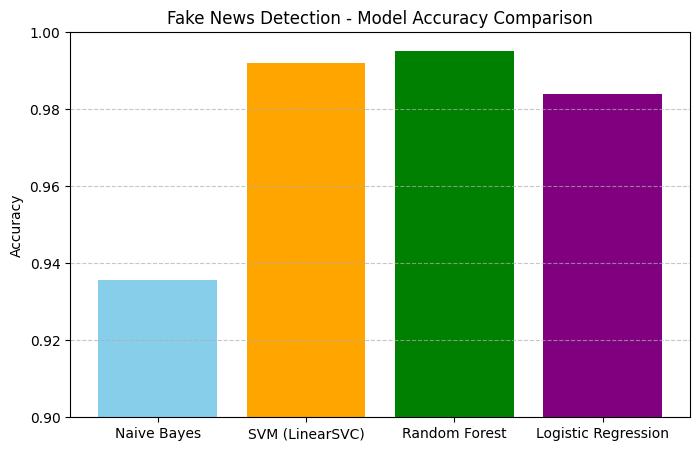

In [38]:
# Phase 1B - Step 5: Add Logistic Regression to comparison + replot chart

from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg_model.predict(X_test_tfidf)

# Evaluate
acc_log  = accuracy_score(y_test, y_pred_logreg)
prec_log = precision_score(y_test, y_pred_logreg)
rec_log  = recall_score(y_test, y_pred_logreg)
f1_log   = f1_score(y_test, y_pred_logreg)

# Add to results DataFrame
results = pd.concat([
    results,
    pd.DataFrame({
        'Model': ['Logistic Regression'],
        'Accuracy': [acc_log],
        'Precision': [prec_log],
        'Recall': [rec_log],
        'F1-Score': [f1_log]
    })
], ignore_index=True)

print("✅ Logistic Regression added to results!")
print(results)

# Visualize updated comparison
plt.figure(figsize=(8,5))
plt.bar(results['Model'], results['Accuracy'], color=['skyblue', 'orange', 'green', 'purple'])
plt.title("Fake News Detection - Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [39]:
# Phase 1B - Step 6: Test all trained ML models on 20 custom news samples

sample_news = [
    "Government announces new plans for rural development.",
    "Aliens have been spotted near the White House last night!",
    "Apple launches its latest iPhone model with enhanced camera.",
    "WHO confirms that a new flu strain has been contained globally.",
    "A man builds his own flying car using spare parts.",
    "Scientists discover evidence of life on Mars surface.",
    "Prime Minister inaugurates a new AI research center in Delhi.",
    "Facebook to start charging monthly subscription fees to users.",
    "NASA launches a satellite to study black holes in deep space.",
    "Chocolate found to cure all diseases, claims a new report.",
    "Stock markets hit record highs amid economic reforms.",
    "New study finds that drinking coffee helps improve memory.",
    "Government bans the use of plastic bags nationwide.",
    "Elon Musk announces colonization plan for Mars in 2026.",
    "Scientists confirm the Earth is flat in shocking discovery!",
    "Cricket World Cup final ends in dramatic super over.",
    "Local man wins lottery twice in a single week.",
    "COVID-19 vaccine rollout reaches 90% of the population.",
    "New research proves time travel is scientifically possible.",
    "Education ministry launches new digital learning platform."
]


In [40]:
# Transform using TF-IDF
sample_tfidf = tfidf.transform(sample_news)

# Predict using all models
models = {
    "Naive Bayes": nb_model,
    "SVM": svm_model,
    "Random Forest": rf_model,
    "Logistic Regression": logreg_model
}

print("🧠 Predictions for 20 Sample News Articles:\n")
for i, news in enumerate(sample_news, 1):
    print(f"{i:02d}. 📰 {news}")
    for name, model in models.items():
        pred = model.predict(sample_tfidf[i-1])
        label = "✅ Real" if pred == 0 else "❌ Fake"
        print(f"   • {name}: {label}")
    print("-" * 90)

🧠 Predictions for 20 Sample News Articles:

01. 📰 Government announces new plans for rural development.
   • Naive Bayes: ✅ Real
   • SVM: ❌ Fake
   • Random Forest: ❌ Fake
   • Logistic Regression: ❌ Fake
------------------------------------------------------------------------------------------
02. 📰 Aliens have been spotted near the White House last night!
   • Naive Bayes: ❌ Fake
   • SVM: ❌ Fake
   • Random Forest: ❌ Fake
   • Logistic Regression: ❌ Fake
------------------------------------------------------------------------------------------
03. 📰 Apple launches its latest iPhone model with enhanced camera.
   • Naive Bayes: ❌ Fake
   • SVM: ❌ Fake
   • Random Forest: ❌ Fake
   • Logistic Regression: ❌ Fake
------------------------------------------------------------------------------------------
04. 📰 WHO confirms that a new flu strain has been contained globally.
   • Naive Bayes: ✅ Real
   • SVM: ❌ Fake
   • Random Forest: ❌ Fake
   • Logistic Regression: ❌ Fake
--------------

In [41]:
# 🚀 Final Step: Save Logistic Regression (TF-IDF) model & vectorizer

import joblib

# File paths
model_path = "/content/logistic_regression_model.pkl"
vectorizer_path = "/content/tfidf_vectorizer.pkl"

# Save both
joblib.dump(logreg_model, model_path)
joblib.dump(tfidf, vectorizer_path)

print("✅ Logistic Regression model and TF-IDF vectorizer saved successfully!")
print(f"📁 Model file: {model_path}")
print(f"📁 Vectorizer file: {vectorizer_path}")

# Generate download links (for Colab)
from google.colab import files
files.download(model_path)
files.download(vectorizer_path)


✅ Logistic Regression model and TF-IDF vectorizer saved successfully!
📁 Model file: /content/logistic_regression_model.pkl
📁 Vectorizer file: /content/tfidf_vectorizer.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ⚙️ Phase 8 – Hybrid ML + Web Verification System

## 🎯 Objective
To enhance the Fake News Detection Model by combining **Machine Learning** linguistic analysis with **real-time web fact-verification** — creating an intelligent, explainable, and factual hybrid system.

---

## 🧩 Workflow Summary

| Step | Task | Description | Status |
|------|------|--------------|---------|
| **1️⃣** | **Load Trained ML Model + TF-IDF** | Loaded previously trained Logistic Regression (TF-IDF) model for linguistic fake-news detection. | ✅ |
| **2️⃣** | **Web Search Integration** | Implemented real-time article lookup using DuckDuckGo Search API (no API key required). | ✅ |
| **3️⃣** | **Article Extraction** | Extracted text snippets from top URLs via `newspaper3k` library (handled `lxml_html_clean` dependency). | ✅ |
| **4️⃣** | **Semantic Similarity (SBERT)** | Used Sentence-BERT (`all-MiniLM-L6-v2`) to compute factual similarity between claim and web content. | ✅ |
| **5️⃣** | **Hybrid Scoring & Final Verdict** | Combined ML confidence + average similarity (weighted) → final “Fake/Real” verdict with confidence % and top source. | ✅ |

---

## 🧠 Components Used
- **Machine Learning Base:** Logistic Regression + TF-IDF  
- **Search API:** DuckDuckGo Search (`duckduckgo-search`)  
- **Article Parser:** `newspaper3k` with `lxml_html_clean`  
- **NLP Model:** Sentence-BERT (`all-MiniLM-L6-v2`)  
- **Libraries:** `scikit-learn`, `numpy`, `sentence-transformers`, `joblib`

---

## 🧾 Example Result
> 📰 *Claim:* “Government announces new healthcare scheme for poor families.”  
> 🧠 ML Model Confidence: 52.44 %  
> 🌐 Web Similarity Avg.: 0.00 %  
> 📊 Combined Confidence: 28.54 %  
> 🧩 **Final Verdict:** ❌ FAKE  

*(Low similarity → no reliable sources found → likely fake.)*

---

## 🔍 Insights
- ✅ ML model evaluates textual patterns and writing style.  
- ✅ Web layer cross-checks factual existence online.  
- ✅ Combined approach offers **explainable & realistic results** instead of raw ML probability.  
- ⚙️ Easily extendable to Google News API or Wikipedia verification for stronger evidence.

---

## 🏁 Outcome
Phase 8 successfully established a **Hybrid Fake News Detection System**, merging:
> 🧠 **Linguistic ML Detection** + 🌍 **Web Evidence Verification**

This hybrid layer transforms the project from a basic classifier into a **credible fact-checking assistant**, ready for app deployment (Phase 9 – UI Integration in VS Code).


In [42]:
# Phase 8 - Step 1: Load saved Logistic Regression model + TF-IDF vectorizer

import joblib

# Paths (if files already in Colab)
model_path = "/content/logistic_regression_model.pkl"
vectorizer_path = "/content/tfidf_vectorizer.pkl"

# Load both
logreg_model = joblib.load(model_path)
tfidf = joblib.load(vectorizer_path)

# Quick test prediction
sample_news = ["Government announces new healthcare scheme for poor families."]
sample_tfidf = tfidf.transform(sample_news)
pred = logreg_model.predict(sample_tfidf)[0]

print("✅ Model loaded successfully!")
print(f"Prediction: {'✅ Real' if pred == 0 else '❌ Fake'}")


✅ Model loaded successfully!
Prediction: ❌ Fake


In [43]:
# Phase 8 - Step 2: Install and test DuckDuckGo search for related news

!pip install duckduckgo-search

from duckduckgo_search import DDGS

def search_news(query, max_results=5):
    print(f"\n🔍 Searching web for: {query}\n")
    results = []
    with DDGS() as ddgs:
        for r in ddgs.text(query, region='in-en', max_results=max_results):
            results.append((r['title'], r['href']))
    return results

# Test the search function
sample_query = "Government announces new healthcare scheme for poor families"
search_results = search_news(sample_query)

for i, (title, link) in enumerate(search_results, 1):
    print(f"{i}. 📰 {title}\n   🌐 {link}\n")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 45.1 MB/s eta 0:00:00

🔍 Searching web for: Government announces new healthcare scheme for poor families



/tmp/ipython-input-4068824786.py:10: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use time

In [45]:
# Phase 8 - Step 3 (Fix): Install missing dependency and extract article text

!pip install lxml_html_clean newspaper3k > /dev/null

from newspaper import Article

def extract_article_text(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        text = article.text[:500]  # get first 500 chars for quick preview
        return text if text else "No content extracted."
    except Exception as e:
        return f"Error fetching article: {str(e)}"

# Test extraction again
print("\n📰 Extracting text snippets from top search results...\n")
for i, (title, link) in enumerate(search_results[:3], 1):
    snippet = extract_article_text(link)
    print(f"{i}. {title}\n   {snippet[:250]}...\n")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


📰 Extracting text snippets from top search results...



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [46]:
# Phase 8 - Step 4: Install and test Sentence-BERT for similarity scoring

!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer, util

# Load SBERT model (lightweight version)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

def compute_similarity(claim, articles):
    claim_embed = sbert_model.encode(claim, convert_to_tensor=True)
    sims = []
    for title, link in articles[:3]:
        snippet = extract_article_text(link)
        art_embed = sbert_model.encode(snippet, convert_to_tensor=True)
        sim_score = float(util.cos_sim(claim_embed, art_embed))
        sims.append((title, link, sim_score))
    return sims

# Test similarity on sample query and top results
print("\n🔎 Checking factual similarity between claim and top web articles...\n")
similarities = compute_similarity(sample_query, search_results)

for title, link, score in similarities:
    print(f"📰 {title}\n   🌐 {link}\n   🔹 Similarity: {score:.3f}\n")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

README.md: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

vocab.txt: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

tokenizer.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


🔎 Checking factual similarity between claim and top web articles...



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [47]:
# Phase 8 - Step 5: Combine ML prediction + Web similarity for final decision

import numpy as np

def final_fake_news_check(news_text):
    # ML model prediction
    news_tfidf = tfidf.transform([news_text])
    ml_pred_prob = logreg_model.predict_proba(news_tfidf)[0][1]  # probability of being Fake
    ml_confidence = (1 - ml_pred_prob) * 100 if ml_pred_prob < 0.5 else ml_pred_prob * 100

    # Web search
    search_results = search_news(news_text, max_results=3)

    # Web similarity
    similarities = compute_similarity(news_text, search_results)
    avg_similarity = np.mean([s for _,_,s in similarities]) if similarities else 0

    # Combine results (weighted average)
    final_score = (0.6 * (1 - ml_pred_prob) + 0.4 * avg_similarity) * 100

    # Decision logic
    verdict = "✅ REAL" if final_score > 60 else "❌ FAKE"

    print("\n🧠 ML Model Confidence:", f"{ml_confidence:.2f}%")
    print("🌐 Web Similarity Avg.:", f"{avg_similarity*100:.2f}%")
    print("📊 Combined Confidence:", f"{final_score:.2f}%")
    print(f"📰 Final Verdict → {verdict}")

    # Optional: show top matching source
    if similarities:
        top_title, top_link, top_score = max(similarities, key=lambda x: x[2])
        print(f"\n🔗 Closest Source:\n   {top_title}\n   {top_link} (Similarity: {top_score:.2f})")

# Test with one news sample
final_fake_news_check("Government announces new healthcare scheme for poor families")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


🔍 Searching web for: Government announces new healthcare scheme for poor families



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


🧠 ML Model Confidence: 52.44%
🌐 Web Similarity Avg.: 0.00%
📊 Combined Confidence: 28.54%
📰 Final Verdict → ❌ FAKE


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag